# 1. Terrestrial vs solar origins of radiation in Earth's atmosphere

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define Constants
Ts = 5785  # K
Te = 255  # K

des = 150e9  # m
re = 6.371e6  # m
rs = 6.96e8  # m

h = 6.62e-34  # m^2 kg/s
c = 299792458  # m/s
k = 1.38e-23  # J/K (kg m2 s-2 K-1)

### (a)

In [3]:
def I_lambda(T, lam):
    intensity = 2 * h * c**2 * (lam**-5)/(np.expm1((h*c)/(lam*k*T)))
    return intensity

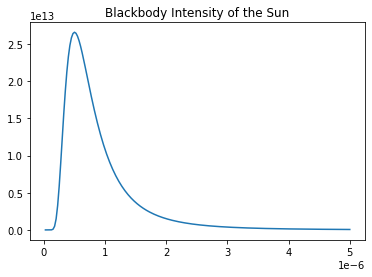

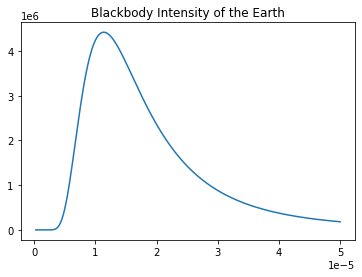

In [4]:
lambda_vals_s = np.linspace(0, 5e-6, 201)[1:]
lambda_vals_e = np.linspace(0, 5e-5, 201)[1:]
Is = I_lambda(Ts, lambda_vals_s)
Ie = I_lambda(Te, lambda_vals_e)

plt.plot(lambda_vals_s, Is)
plt.title('Blackbody Intensity of the Sun')
plt.show()

plt.plot(lambda_vals_e, Ie)
plt.title('Blackbody Intensity of the Earth')
plt.show()

In [5]:
max_s = lambda_vals_s[np.argmax(Is)]*10**9
max_e = lambda_vals_e[np.argmax(Ie)]*10**6

print(f"The peak wavelength of the Sun's radiation is at {max_s:.0f} nm.")
print()
print(f"The peak wavelength of the Earth's radiation is at {max_e:.0f} \u03BCm.")

The peak wavelength of the Sun's radiation is at 500 nm.

The peak wavelength of the Earth's radiation is at 11 μm.


### (b)

In [6]:
Is_smax = I_lambda(Ts, max_s)
Ie_smax = I_lambda(Te, max_s)
Is_emax = I_lambda(Ts, max_e)
Ie_emax = I_lambda(Te, max_e)

ratio_smax = Is_smax / Ie_smax
ratio_emax = Is_emax / Ie_emax

print(f"The ratio of the spectra at {max_s:.0f} nm is {ratio_smax}.")
print(f"The ratio of the spectra at {max_e:.0f} \u03BCm is {ratio_emax}.")

The ratio of the spectra at 500 nm is 22.68627573285443.
The ratio of the spectra at 11 μm is 22.686328867691113.


### (c)

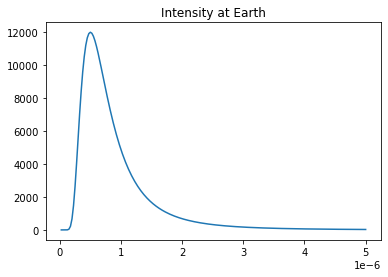

In [7]:
s_emit_area = 4 * np.pi * des**2  # emits radiation as a shell with radius des
e_absorb_area = np.pi * re**2  # absorbs radiation as a disk with radius re
frac_earth = e_absorb_area / s_emit_area

Is_earth = Is * frac_earth
plt.plot(lambda_vals_s, Is_earth)
plt.title('Intensity at Earth')
plt.show()

In [8]:
Is_smax_earth = Is_smax * frac_earth
Is_emax_earth = Is_emax * frac_earth

ratio_smax_earth = Is_smax_earth / Ie_smax
ratio_emax_earth = Is_emax_earth / Ie_emax

print(f"The ratio of the spectra at Earth's atmosphere at {max_s:.0f} nm is {ratio_smax_earth}.")
print(f"The ratio of the spectra at Earth's atmosphere at {max_e:.0f} \u03BCm is {ratio_emax_earth}.")

The ratio of the spectra at Earth's atmosphere at 500 nm is 1.0231419862484147e-08.
The ratio of the spectra at Earth's atmosphere at 11 μm is 1.0231443826083542e-08.


### (d)

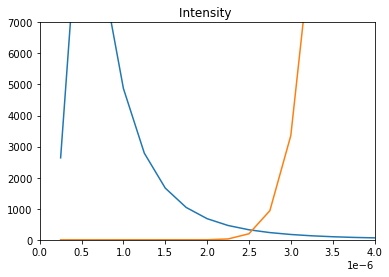

In [9]:
Is_earth_full = I_lambda(Ts, lambda_vals_e) * frac_earth
plt.plot(lambda_vals_e, Is_earth_full, lambda_vals_e, Ie)
plt.xlim([0, 0.4e-5])
plt.ylim([0, 7e3])
plt.title('Intensity ')
plt.show()

The spectra overlap at a wavelength of about 2.5 micrometers. 

In [10]:
import scipy.integrate as integrate

def intens_ratio(lam):
    ratio = (I_lambda(Ts, lam)*frac_earth) / I_lambda(Te, lam)
    return ratio
    
rad = integrate.quad(intens_ratio, 2.5e-6, 100e-6)
print(rad[0])

2.2075852465595215e-07


The ratio from lambda_overlap to 100 um tells us the relative fraction of the radiation at the top of the atmosphere between 2.5 and 100 um that is coming from the Sun. The amount of longwave radiation at the top of the atmosphere that originates from the sun is a tiny amount when compared to the amount of longwave radiation that comes from the Earth.

### (e)

The 4th power in the Stefan-Boltzmann equation is a result of the energy spectrum of photons. The photon spectrum, which is the energy density per unit photon energy, depends on the third power of the photon energy (1 for each spatial dimension) that is proportional to T. To find the total energy density, we integrate over all the photon energies, which gives us another factor of T so that we end up with a 4th power. The 4 comes from integrating the 3 spatial dimensions.

# 2. Climate of Flatland

I did most of Question 2 on paper.

### (b)

In [11]:
import scipy.optimize as so

In [12]:
def eq(x):
    return (x*np.exp(x)) / (np.expm1(x)) - 4

x_init = 4  # initial guess based on 3d version

x = so.fsolve(eq, x_init)[0]

wein_const = (h*c) / (x*k)  # m K

print(f"Wein's Law in 2D: \u03BBT = {(wein_const*10**6):.0f} \u03BCm K")

Wein's Law in 2D: λT = 3668 μm K


In [13]:
T = 5785  # K
l_max = wein_const / T * 10**9
print(f"The solar intensity peaks at \u03BB = {l_max:.0f} nm")

The solar intensity peaks at λ = 634 nm


### (c)

In [14]:
A = 2.404
sig_2d = (k**3 * A) / (h**2 * c)
print(f"\u03C3 = {sig_2d:.2e} W/m/K^3")
print(f"The 2D Stefan-Boltzmann equation is \u03C3T^3")

σ = 4.81e-11 W/m/K^3
The 2D Stefan-Boltzmann equation is σT^3


### (d)

In [15]:
S0 = sig_2d * T**3
rad_earth = S0 * re / 2
print(f"The radiation that reaches Earth averaged over its 1D surface is {rad_earth:.2e} W/m")

The radiation that reaches Earth averaged over its 1D surface is 2.97e+07 W/m


In [16]:
alpha = 0.3
T_earth = (((1-alpha)*S0*re) / (2*sig_2d)) ** (1/3)
print(f"The temperature of the 2D Earth is {T_earth:.2f} K.")

The temperature of the 2D Earth is 755779.74 K.


# 3. Radiative forcing and global warming in a two-layer atmosphere model

In [17]:
sig = 5.67e-8  # W/m^2 K^4
so = 1370  # W/m^2
alpha = 0.3

### (a)

In [18]:
eps1 = 0.65
eps2 = 0.25

In [19]:
Tsurf4 = ((1-alpha)*(so/4)*(4-eps1*eps2)) / (sig*(2-eps1)*(2-eps2))
T14 = Tsurf4 * ((2+eps2-eps1*eps2) / (4-eps1*eps2))
T24 = Tsurf4 * ((2-eps1) / (4-eps1*eps2))

Tsurf = Tsurf4**(1/4)
T1 = T14**(1/4)
T2 = T24**(1/4)

print(f'Ts: {Tsurf:.2f} K')
print(f'T1: {T1:.2f} K')
print(f'T2: {T2:.2f} K')

Ts: 287.88 K
T1: 247.23 K
T2: 221.71 K


### (b)

In [20]:
eps2_prime = 0.29

In [21]:
def TOA(e1, e2):
    return (1-e1)*(1-e2)*sig*Tsurf4 + (1-e2)*sig*T14 + e2*sig*T24

In [22]:
delta_TOA = TOA(eps1, eps2_prime) - TOA(eps1, eps2)
print(f'The change in net TOA radiation flux is {delta_TOA:0.2f} W/m^2.')

The change in net TOA radiation flux is -8.45 W/m^2.


This is roughly double the amount that we calculated in class for a doubling of CO2 (-3.9 W/m^2).

### (c)

In [23]:
def surf_flux(e1, e2):
    return (1-alpha)*so/4 + e1*sig*T14 + (1-e1)*e2*sig*T24 - sig*Tsurf4

In [24]:
delta_surf_flux = surf_flux(eps1, eps2_prime) - surf_flux(eps1, eps2)
print(f'The change in net surface radiation flux is {delta_surf_flux:0.2f} W/m^2.')

The change in net surface radiation flux is 1.92 W/m^2.


Because the TOA radiation flux decreases and the surface radiation flux increases, I expect Ts, T1, and T2 to increase once they are allowed to adjust.

### (d)

In [25]:
T14_new = Tsurf4 * ((2+eps2_prime-eps1*eps2_prime) / (4-eps1*eps2_prime))
T24_new = Tsurf4 * ((2-eps1) / (4-eps1*eps2_prime))

T1_new = T14_new**(1/4)
T2_new = T24_new**(1/4)

print(f'Adjusted T1: {T1_new:.2f} K')
print(f'Adjusted T2: {T2_new:.2f} K')

Adjusted T1: 248.07 K
Adjusted T2: 222.09 K


In [26]:
def TOA_new(e1, e2):
    return (1-e1)*(1-e2)*sig*Tsurf4 + (1-e2)*sig*T14_new + e2*sig*T24_new

def surf_flux_new(e1, e2):
    return (1-alpha)*so/4 + e1*sig*T14_new + (1-e1)*e2*sig*T24_new - sig*Tsurf4

In [27]:
delta_TOA_new = TOA_new(eps1, eps2_prime) - TOA_new(eps1, eps2)
print(f'The adjusted change in net TOA radiation flux is {delta_TOA_new:0.2f} W/m^2.')

delta_surf_flux_new = surf_flux_new(eps1, eps2_prime) - surf_flux_new(eps1, eps2)
print(f'The adjusted change in net surface radiation flux is {delta_surf_flux_new:0.2f} W/m^2.')

The adjusted change in net TOA radiation flux is -8.52 W/m^2.
The adjusted change in net surface radiation flux is 1.93 W/m^2.


The effective radiative forcing is larger than the instantaneous radiative forcing.

### (e)

In [28]:
Tsurf_new = (((1-alpha)*(so/4)*(4-eps1*eps2_prime)) / (sig*(2-eps1)*(2-eps2_prime)))**(1/4)
print(f'The Equilibrium Climate Sensitivity is {(Tsurf_new-Tsurf):.2f} K.')

The Equilibrium Climate Sensitivity is 1.18 K.


This ECS value is below the canonical ECS range of 2-5 K. Possible climate processes not in this model that could explain this difference include changes in surface albedo, changes in cloud cover, and ocean dynamics. These are all sensitive to changes in radiative forcing and could influence the ECS.